In [2]:
from rich.console import Console
from rich.table import Table

def let_freq(dct):
    table = Table(title="корпус")
    table.add_column("буква", justify="right", style="cyan", no_wrap=True)
    table.add_column("частота", justify="right", style="cyan", no_wrap=True)
    letters = {k: v for k, v in sorted(dct.items(), key=lambda item: item[1], reverse=True)}
    for k, v in letters.items():
        table.add_row(f'{k}', f'{v}')
    console = Console()
    console.print(table)

def let_freq_pers(dct):
    table = Table(title="корпус проценты")
    table.add_column("буква", justify="right", style="cyan", no_wrap=True)
    table.add_column("частота (в процентах)", justify="right", style="cyan", no_wrap=True)
    dct_pers = {}
    for k, v in dct.items():
        dct_pers[k] = round(v / sum([v for v in dct.values()]) * 100, 2)
    dct_pers = {k: v for k, v in sorted(dct_pers.items(), key=lambda item: item[1], reverse=True)}

    for k, v in dct_pers.items():
        table.add_row(f'{k}', f'{v}')
    console = Console()
    console.print(table)

In [3]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
def plot(dct):
    dct = {k: v for k, v in sorted(dct.items(), key=lambda item: item[1], reverse=True)}
    x = [i for i in dct.keys()]
    y = [i for i in dct.values()]
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(x, y)
    ax.set_yticks([250000, 200000, 150000, 100000, 50000, 10000])
    ax.yaxis.set_minor_locator(MultipleLocator(10000))
    plt.show()

In [4]:
def tsipf(dct):
    ind = {}
    k = 1
    for v in dct.values():
        ind[k] = round(max([i for i in dct.values()]) / v, 1)
        k+=1

    table = Table(title="индекс Ципфа")
    table.add_column("ранг", justify="right", style="cyan", no_wrap=True)
    table.add_column("индекс", justify="right", style="cyan", no_wrap=True)
    for k, v in ind.items():
        table.add_row(f'{k}', f'{v}')
    console = Console()
    console.print(table)

In [5]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
def plot_ind(dct):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_figheight(7)
    fig.set_figwidth(10)
    x = [str(i) for i in dct.keys()]
    y = [i for i in dct.values()]
    x_grid = x
    y_grid = [round(max([i for i in dct.values()]) / i, 1) for i in range(1, 33)]
    ax.plot(x, y, marker='o', markersize = 3)
    ax.plot(x_grid, y_grid, marker='o', markersize = 3)
    ax.set_yticks([y_grid[0], y_grid[1], y_grid[2], y_grid[7], y_grid[15], y_grid[len(y_grid)-1]])
    plt.grid(True, color = "grey", linewidth = "0.8", linestyle = '--')
    plt.show()

Здесь мы подсчитали абсолютное количество букв в корпусе и проконтролировали количество слов (2 миллиона). Тексты взяты из ГИКРЯ, сбалансированы из 4 подкорпусов (Новости, Вконтакте, Живой Журнал и Журнальный Зал).

In [1]:
from bs4 import BeautifulSoup
import string, os, re
letters = {}
letset = ['ё', 'й', 'ц', 'у', 'к', 'е', 'н', 'г', 'ш', 'щ', 'з', 'х', 'ъ', 'э', 'ж', 'д', 'л', 'о', 'р', 'п', 'а', 'в', 'ы', 'ф', 'я', 'ч', 'с', 'м', 'и', 'т', 'ь', 'б', 'ю']
wordcount = 0
for f in os.listdir(r"C:\Users\lizao\Desktop\smth\гикря"):
    with open(os.path.join(r"C:\Users\lizao\Desktop\smth\гикря", f), 'r', encoding = 'utf-8') as file:
        raw = file.read()
    soup = BeautifulSoup(raw)
      
    for p in soup.find_all('text'):
        words = re.findall(r'[а-яА-Я]+(?:-[а-яА-Я]+)?', p.text)
        wordcount += len(words)
        if wordcount >= 2e6:
            break
        else:
            for word in words:
                    for char in word:
                        if char.lower() in letset:
                            if char.lower() in letters:
                                letters[char.lower()] +=1
                            else:
                                letters[char.lower()] = 1


In [2]:
from rich.console import Console
from rich.table import Table

table = Table(title="корпус")
table.add_column("буква", justify="right", style="cyan", no_wrap=True)
table.add_column("частота", justify="right", style="cyan", no_wrap=True)
letters = {k: v for k, v in sorted(letters.items(), key=lambda item: item[1], reverse=True)}
for k, v in letters.items():
    table.add_row(f'{k}', f'{v}')
console = Console()
console.print(table)

      корпус       
┏━━━━━━━┳━━━━━━━━━┓
┃ буква ┃ частота ┃
┡━━━━━━━╇━━━━━━━━━┩
│     о │ 1139224 │
│     е │  893188 │
│     а │  849519 │
│     т │  719036 │
│     и │  712462 │
│     н │  686425 │
│     с │  543568 │
│     р │  451965 │
│     в │  433939 │
│     л │  417756 │
│     к │  363288 │
│     м │  344759 │
│     д │  309652 │
│     п │  293783 │
│     у │  287491 │
│     я │  218049 │
│     ь │  208050 │
│     ы │  187322 │
│     б │  178761 │
│     ч │  169892 │
│     з │  163136 │
│     г │  159361 │
│     й │  114294 │
│     ж │  113098 │
│     х │   93684 │
│     ш │   79452 │
│     ю │   78424 │
│     э │   43560 │
│     ц │   40624 │
│     щ │   38502 │
│     ф │   29299 │
│     ъ │    2934 │
└───────┴─────────┘

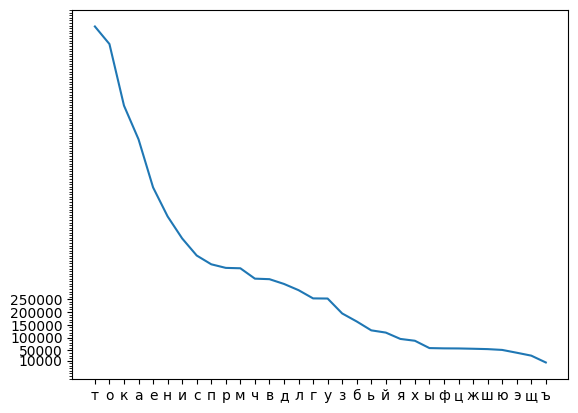

In [116]:
plot(letters)

Подсчет индекса Ципфа:

* индекс считается как отношение самой частотной буквы к букве с соответсвуюющим рангом

In [110]:
tsipf(letters)

  индекс Ципфа   
┏━━━━━━┳━━━━━━━━┓
┃ ранг ┃ индекс ┃
┡━━━━━━╇━━━━━━━━┩
│    1 │    1.0 │
│    2 │    1.1 │
│    3 │    1.3 │
│    4 │    1.5 │
│    5 │    1.9 │
│    6 │    2.3 │
│    7 │    2.7 │
│    8 │    3.1 │
│    9 │    3.4 │
│   10 │    3.5 │
│   11 │    3.5 │
│   12 │    4.0 │
│   13 │    4.0 │
│   14 │    4.2 │
│   15 │    4.6 │
│   16 │    5.2 │
│   17 │    5.2 │
│   18 │    6.8 │
│   19 │    8.1 │
│   20 │   10.2 │
│   21 │   11.0 │
│   22 │   13.9 │
│   23 │   15.0 │
│   24 │   22.3 │
│   25 │   22.7 │
│   26 │   22.8 │
│   27 │   23.3 │
│   28 │   23.9 │
│   29 │   25.3 │
│   30 │   32.1 │
│   31 │   44.5 │
│   32 │  460.1 │
└──────┴────────┘

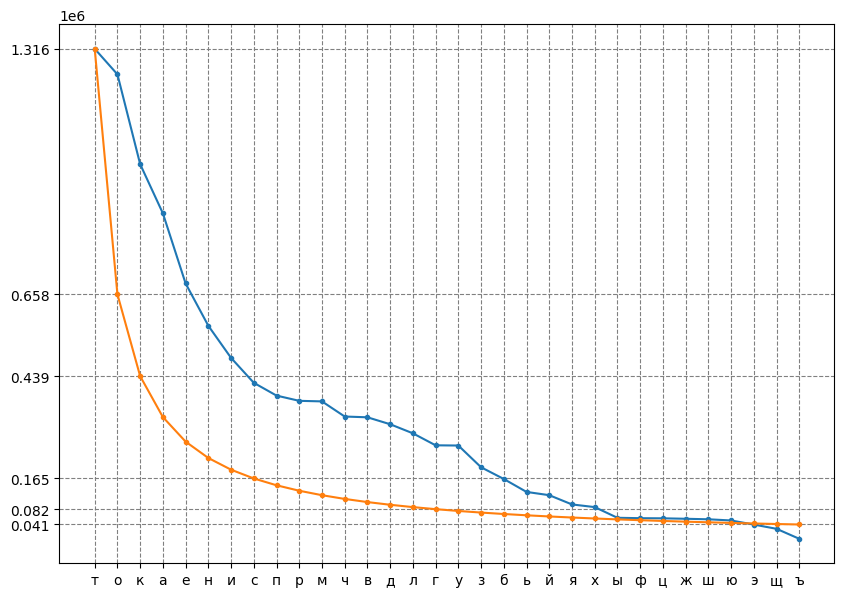

In [107]:
plot_ind(letters)

Подсчет относительных частот букв в корпусе.
* здесь и далее округление до сотых

In [3]:
vols = 'ёуеыаоэяию'
cons = 'йцкнгшщзхфвпрлджчсмтб'
etc = 'ьъ'

table = Table(title="корпус проценты")
table.add_column("буква", justify="right", style="cyan", no_wrap=True)
table.add_column("частота (в процентах)", justify="right", style="cyan", no_wrap=True)
letters_pers = {}
for k, v in letters.items():
    letters_pers[k] = round(v / sum([v for v in letters.values()]) * 100, 2)
letters_pers = {k: v for k, v in sorted(letters_pers.items(), key=lambda item: item[1], reverse=True)}

for k, v in letters_pers.items():
    table.add_row(f'{k}', f'{v}')
console = Console()
console.print(table)

         корпус проценты         
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓
┃ буква ┃ частота (в процентах) ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩
│     т │                 12.29 │
│     о │                 11.65 │
│     к │                   9.4 │
│     а │                  8.17 │
│     е │                  6.42 │
│     н │                  5.36 │
│     и │                  4.55 │
│     с │                  3.93 │
│     п │                  3.61 │
│     р │                  3.48 │
│     м │                  3.47 │
│     ч │                  3.09 │
│     в │                  3.07 │
│     д │                  2.89 │
│     л │                  2.67 │
│     г │                  2.37 │
│     у │                  2.36 │
│     з │                  1.82 │
│     б │                  1.52 │
│     ь │                   1.2 │
│     й │                  1.12 │
│     я │                  0.89 │
│     х │                  0.82 │
│     ы │                  0.55 │
│     ф │                  0.54 │
│     ц │                  0.54 │
│     ж │                  0.53 │
│     ш │                  0.51 │
│     ю │                  0.48 │
│     э │                  0.38 │
│     щ │                  0.28 │
│     ъ │                  0.03 │
└───────┴───────────────────────┘

Подсчет относительных частот согласных отдельно.

In [4]:
abs_vols = {k: v for k, v in sorted(letters.items(), key=lambda item: item[1], reverse=True) if k in vols}
abs_cons = {k: v for k, v in sorted(letters.items(), key=lambda item: item[1], reverse=True) if k in cons}
dct_cons = {}
dct_vols = {}
for k, v in abs_cons.items():
    dct_cons[k] = round(v / sum([v for v in abs_cons.values()]) * 100, 2) 
for k, v in abs_vols.items():
    dct_vols[k] = round(v / sum([v for v in abs_vols.values()]) * 100, 2) 

table = Table(title="относительные частоты согласных")
table.add_column("буква", justify="right", style="cyan", no_wrap=True)
table.add_column("частота (в процентах)", justify="right", style="cyan", no_wrap=True)
dct_cons_pers = {}
for k, v in dct_cons.items():
    dct_cons_pers[k] = round(v / sum([v for v in dct_cons.values()]) * 100, 2)
dct_cons_pers = {k: v for k, v in sorted(dct_cons_pers.items(), key=lambda item: item[1], reverse=True)}

for k, v in dct_cons_pers.items():
    table.add_row(f'{k}', f'{v}')
console = Console()
console.print(table)

 относительные частоты согласных 
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓
┃ буква ┃ частота (в процентах) ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩
│     т │                 19.42 │
│     к │                 14.86 │
│     н │                  8.46 │
│     с │                  6.21 │
│     п │                   5.7 │
│     р │                   5.5 │
│     м │                  5.47 │
│     ч │                  4.88 │
│     в │                  4.85 │
│     д │                  4.57 │
│     л │                  4.21 │
│     г │                  3.74 │
│     з │                  2.87 │
│     б │                  2.41 │
│     й │                  1.77 │
│     х │                  1.29 │
│     ф │                  0.86 │
│     ц │                  0.85 │
│     ж │                  0.83 │
│     ш │                  0.81 │
│     щ │                  0.44 │
└───────┴───────────────────────┘

Подчет относительных частот гласных отдельно

In [5]:
table = Table(title="относительные частоты гласных")
table.add_column("буква", justify="right", style="cyan", no_wrap=True)
table.add_column("частота (в процентах)", justify="right", style="cyan", no_wrap=True)
dct_vols_pers = {}
for k, v in dct_vols.items():
    dct_vols_pers[k] = round(v / sum([v for v in dct_vols.values()]) * 100, 2)
dct_vols_pers = {k: v for k, v in sorted(dct_vols_pers.items(), key=lambda item: item[1], reverse=True)}

for k, v in dct_vols_pers.items():
    table.add_row(f'{k}', f'{v}')
console = Console()
console.print(table)

  относительные частоты гласных  
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓
┃ буква ┃ частота (в процентах) ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩
│     о │                 32.85 │
│     а │                 23.05 │
│     е │                  18.1 │
│     и │                 12.84 │
│     у │                  6.66 │
│     я │                   2.5 │
│     ы │                  1.56 │
│     ю │                  1.37 │
│     э │                  1.08 │
└───────┴───────────────────────┘

Подсчет абсолютных частот букв в фанфике. (количество слов - 148350)

In [6]:
from bs4 import BeautifulSoup
import string, os, re
letters2 = {}
letset = ['ё', 'й', 'ц', 'у', 'к', 'е', 'н', 'г', 'ш', 'щ', 'з', 'х', 'ъ', 'э', 'ж', 'д', 'л', 'о', 'р', 'п', 'а', 'в', 'ы', 'ф', 'я', 'ч', 'с', 'м', 'и', 'т', 'ь', 'б', 'ю']
wordcount2 = 0

with open(r"C:\Users\lizao\Downloads\Telegram Desktop\Kto-vy-professor-Ambridz (1).txt", 'r', encoding = 'utf-8') as file:
    raw = file.read()
      
words2 = re.findall(r'[а-яА-Я]+(?:-[а-яА-Я]?)', raw)
wordcount2 += len(words2)
for word in words2:
        for char in word:
            if char.lower() in letset:
                if char.lower() in letters2:
                    letters2[char.lower()] +=1
                else:
                    letters2[char.lower()] = 1

table = Table(title="фанфик")
table.add_column("буква", justify="right", style="cyan", no_wrap=True)
table.add_column("частота", justify="right", style="cyan", no_wrap=True)
letters2 = {k: v for k, v in sorted(letters2.items(), key=lambda item: item[1], reverse=True)}
for k, v in letters2.items():
    table.add_row(f'{k}', f'{v}')
console = Console()
console.print(table)

      фанфик       
┏━━━━━━━┳━━━━━━━━━┓
┃ буква ┃ частота ┃
┡━━━━━━━╇━━━━━━━━━┩
│     т │    1420 │
│     о │    1018 │
│     к │     997 │
│     а │     706 │
│     е │     681 │
│     н │     394 │
│     ч │     377 │
│     и │     349 │
│     м │     340 │
│     с │     312 │
│     д │     305 │
│     в │     276 │
│     г │     232 │
│     п │     223 │
│     р │     217 │
│     л │     214 │
│     б │     213 │
│     у │     165 │
│     з │     144 │
│     ь │      90 │
│     й │      88 │
│     я │      64 │
│     х │      57 │
│     ш │      49 │
│     ы │      45 │
│     э │      28 │
│     ю │      23 │
│     щ │      22 │
│     ц │      20 │
│     ж │      16 │
│     ф │       7 │
│     ъ │       1 │
└───────┴─────────┘

In [ ]:
plot(letters2)

Подсчет относительных частот букв в фанфике.

In [7]:
table = Table(title="фанфик проценты")
table.add_column("буква", justify="right", style="cyan", no_wrap=True)
table.add_column("частота (в процентах)", justify="right", style="cyan", no_wrap=True)
letters2_pers = {}
for k, v in letters2.items():
    letters2_pers[k] = round(v / sum([v for v in letters2.values()]) * 100, 2)
letters2_pers = {k: v for k, v in sorted(letters2_pers.items(), key=lambda item: item[1], reverse=True)}

for k, v in letters2_pers.items():
    table.add_row(f'{k}', f'{v}')
console = Console()
console.print(table)

         фанфик проценты         
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓
┃ буква ┃ частота (в процентах) ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩
│     т │                 15.62 │
│     о │                  11.2 │
│     к │                 10.96 │
│     а │                  7.76 │
│     е │                  7.49 │
│     н │                  4.33 │
│     ч │                  4.15 │
│     и │                  3.84 │
│     м │                  3.74 │
│     с │                  3.43 │
│     д │                  3.35 │
│     в │                  3.04 │
│     г │                  2.55 │
│     п │                  2.45 │
│     р │                  2.39 │
│     л │                  2.35 │
│     б │                  2.34 │
│     у │                  1.81 │
│     з │                  1.58 │
│     ь │                  0.99 │
│     й │                  0.97 │
│     я │                   0.7 │
│     х │                  0.63 │
│     ш │                  0.54 │
│     ы │                  0.49 │
│     э │                  0.31 │
│     ю │                  0.25 │
│     щ │                  0.24 │
│     ц │                  0.22 │
│     ж │                  0.18 │
│     ф │                  0.08 │
│     ъ │                  0.01 │
└───────┴───────────────────────┘

Подсчет относительных частот гласных отдельно в фанфике.

In [8]:
vols = 'ёуеыаоэяию'
cons = 'йцкнгшщзхфвпрлджчсмтб'
etc = 'ьъ'

abs_vols2 = {k: v for k, v in sorted(letters2.items(), key=lambda item: item[1], reverse=True) if k in vols}
abs_cons2 = {k: v for k, v in sorted(letters2.items(), key=lambda item: item[1], reverse=True) if k in cons}
dct_vols2 = {}
dct_cons2 = {}

for k, v in abs_cons2.items():
    dct_cons2[k] = v / sum([v for v in abs_cons2.values()]) * 100

for k, v in abs_vols2.items():
    dct_vols2[k] = v / sum([v for v in abs_vols2.values()]) * 100

table = Table(title="относительные частоты гласных")
table.add_column("буква", justify="right", style="cyan", no_wrap=True)
table.add_column("частота (в процентах)", justify="right", style="cyan", no_wrap=True)
dct_vols_pers2 = {}
for k, v in dct_vols2.items():
    dct_vols_pers2[k] = round(v / sum([v for v in dct_vols2.values()]) * 100, 2)
dct_vols_pers2 = {k: v for k, v in sorted(dct_vols_pers2.items(), key=lambda item: item[1], reverse=True)}

for k, v in dct_vols_pers2.items():
    table.add_row(f'{k}', f'{v}')
console = Console()
console.print(table)

  относительные частоты гласных  
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓
┃ буква ┃ частота (в процентах) ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩
│     о │                 33.06 │
│     а │                 22.93 │
│     е │                 22.12 │
│     и │                 11.33 │
│     у │                  5.36 │
│     я │                  2.08 │
│     ы │                  1.46 │
│     э │                  0.91 │
│     ю │                  0.75 │
└───────┴───────────────────────┘

Подсчет относительных частот согласных отдельно в фанфике.

In [9]:
table = Table(title="относительные частоты согласных")
table.add_column("буква", justify="right", style="cyan", no_wrap=True)
table.add_column("частота (в процентах)", justify="right", style="cyan", no_wrap=True)
dct_cons_pers2 = {}
for k, v in dct_cons2.items():
    dct_cons_pers2[k] = round(v / sum([v for v in dct_cons2.values()]) * 100, 2)
dct_cons_pers2 = {k: v for k, v in sorted(dct_cons_pers2.items(), key=lambda item: item[1], reverse=True)}

for k, v in dct_cons_pers2.items():
    table.add_row(f'{k}', f'{v}')
console = Console()
console.print(table)

 относительные частоты согласных 
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓
┃ буква ┃ частота (в процентах) ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩
│     т │                 23.97 │
│     к │                 16.83 │
│     н │                  6.65 │
│     ч │                  6.37 │
│     м │                  5.74 │
│     с │                  5.27 │
│     д │                  5.15 │
│     в │                  4.66 │
│     г │                  3.92 │
│     п │                  3.76 │
│     р │                  3.66 │
│     л │                  3.61 │
│     б │                   3.6 │
│     з │                  2.43 │
│     й │                  1.49 │
│     х │                  0.96 │
│     ш │                  0.83 │
│     щ │                  0.37 │
│     ц │                  0.34 │
│     ж │                  0.27 │
│     ф │                  0.12 │
└───────┴───────────────────────┘

Сравнение относительных частот букв в корпусе и фанфике. За основу берется значение в корпусе, формула рассчета: частота в корпусе - частота в фанфике.

In [10]:
compare = {}
for k, v in letters_pers.items():
    for k2, v2 in letters2_pers.items():
        compare[k] = round(v - letters2_pers[k], 2)

table = Table(title="сравнение относительных частот в корпусе и в фанфике")
table.add_column("буква", justify="right", style="cyan", no_wrap=True)
table.add_column("сравнение", justify="right", style="cyan", no_wrap=True)
for k, v in compare.items():
    table.add_row(f'{k}', f'{v}')
console = Console()
console.print(table)

      сравнение      
относительных частот 
в корпусе и в фанфике
┏━━━━━━━┳━━━━━━━━━━━┓
┃ буква ┃ сравнение ┃
┡━━━━━━━╇━━━━━━━━━━━┩
│     т │     -3.33 │
│     о │      0.45 │
│     к │     -1.56 │
│     а │      0.41 │
│     е │     -1.07 │
│     н │      1.03 │
│     и │      0.71 │
│     с │       0.5 │
│     п │      1.16 │
│     р │      1.09 │
│     м │     -0.27 │
│     ч │     -1.06 │
│     в │      0.03 │
│     д │     -0.46 │
│     л │      0.32 │
│     г │     -0.18 │
│     у │      0.55 │
│     з │      0.24 │
│     б │     -0.82 │
│     ь │      0.21 │
│     й │      0.15 │
│     я │      0.19 │
│     х │      0.19 │
│     ы │      0.06 │
│     ф │      0.46 │
│     ц │      0.32 │
│     ж │      0.35 │
│     ш │     -0.03 │
│     ю │      0.23 │
│     э │      0.07 │
│     щ │      0.04 │
│     ъ │      0.02 │
└───────┴───────────┘

Создание таблицы xlsx с результатами.

In [ ]:
import pandas as pd
order = [k for k in letters_pers.keys()]
new_fan = {}
for k in order:
    new_fan[k] = letters2_pers[k]
data = pd.DataFrame({'буквы' : [k for k in letters_pers.keys()], 'корпус' : [v for v in letters_pers.values()], 'фанфик' : [v for v in new_fan.values()]})
data.to_excel(r"C:\Users\lizao\Desktop\smth\шабат.xlsx")

Английский

In [6]:
from bs4 import BeautifulSoup as bs
import wikipediaapi

texts_eng = open(r"C:\Users\lizao\Desktop\smth\shabat_eng.txt", 'w', encoding = 'utf-8')

wiki_wiki = wikipediaapi.Wikipedia(
        language='en',
        extract_format=wikipediaapi.ExtractFormat.WIKI
)

page_py = wiki_wiki.page('Linguistics')
for name in page_py.links.keys():
    texts_eng.write(wiki_wiki.page(name).text)

In [8]:
import string, os, re
letters_eng = {}
letset_eng = set(['q', 'w', 'e', 'r', 't', 'y', 'u', 'o', 'p', 'l', 'k', 'j', 'h', 'g', 'f', 'd', 's', 'a', 'z', 'x', 'c', 'v', 'b', 'n', 'm'])
wordcount_eng = 0

with open(r"C:\Users\lizao\Desktop\smth\shabat_eng.txt", 'r', encoding = 'utf-8') as f:
     text_eng = f.read()

words_eng = re.finditer(r'[a-zA-Z]+(?:-[a-zA-Z]+)?', text_eng)
for word in words_eng:
    if wordcount_eng == 2e6:
        break
    else:
        wordcount_eng += 1
        for char in word.group():
            if char.lower() in letset_eng:
                if char.lower() in letters_eng:
                    letters_eng[char.lower()] +=1
                else:
                    letters_eng[char.lower()] = 1

print(wordcount_eng)


2000000


In [9]:
let_freq(letters_eng)

      корпус       
┏━━━━━━━┳━━━━━━━━━┓
┃ буква ┃ частота ┃
┡━━━━━━━╇━━━━━━━━━┩
│     e │ 1261296 │
│     t │  928960 │
│     a │  901063 │
│     n │  830766 │
│     o │  808295 │
│     s │  758444 │
│     r │  657563 │
│     l │  464968 │
│     h │  456048 │
│     c │  436334 │
│     d │  383090 │
│     u │  303623 │
│     m │  286027 │
│     p │  248837 │
│     g │  239379 │
│     f │  226875 │
│     y │  169980 │
│     b │  141471 │
│     w │  131262 │
│     v │  115496 │
│     k │   53306 │
│     x │   31449 │
│     j │   16806 │
│     z │   13857 │
│     q │   11739 │
└───────┴─────────┘

In [10]:
let_freq_pers(letters_eng)

         корпус проценты         
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓
┃ буква ┃ частота (в процентах) ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩
│     e │                 12.77 │
│     t │                  9.41 │
│     a │                  9.12 │
│     n │                  8.41 │
│     o │                  8.18 │
│     s │                  7.68 │
│     r │                  6.66 │
│     l │                  4.71 │
│     h │                  4.62 │
│     c │                  4.42 │
│     d │                  3.88 │
│     u │                  3.07 │
│     m │                   2.9 │
│     p │                  2.52 │
│     g │                  2.42 │
│     f │                   2.3 │
│     y │                  1.72 │
│     b │                  1.43 │
│     w │                  1.33 │
│     v │                  1.17 │
│     k │                  0.54 │
│     x │                  0.32 │
│     j │                  0.17 │
│     z │                  0.14 │
│     q │                  0.12 │
└───────┴───────────────────────┘

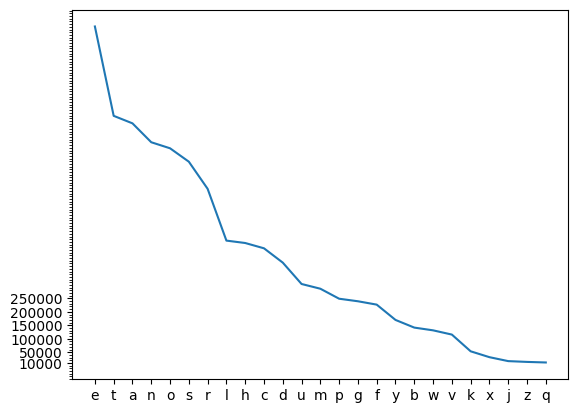

In [11]:
plot(letters_eng)

In [12]:
tsipf(letters_eng)

  индекс Ципфа   
┏━━━━━━┳━━━━━━━━┓
┃ ранг ┃ индекс ┃
┡━━━━━━╇━━━━━━━━┩
│    1 │    1.4 │
│    2 │    2.8 │
│    3 │    1.0 │
│    4 │    2.9 │
│    5 │    1.5 │
│    6 │    4.2 │
│    7 │    1.9 │
│    8 │    7.4 │
│    9 │    8.9 │
│   10 │    1.7 │
│   11 │    1.4 │
│   12 │    3.3 │
│   13 │    1.6 │
│   14 │    5.6 │
│   15 │    2.7 │
│   16 │    9.6 │
│   17 │    4.4 │
│   18 │    5.1 │
│   19 │   10.9 │
│   20 │    5.3 │
│   21 │   23.7 │
│   22 │   75.1 │
│   23 │   91.0 │
│   24 │   40.1 │
│   25 │  107.4 │
└──────┴────────┘

ValueError: x and y must have same first dimension, but have shapes (25,) and (32,)

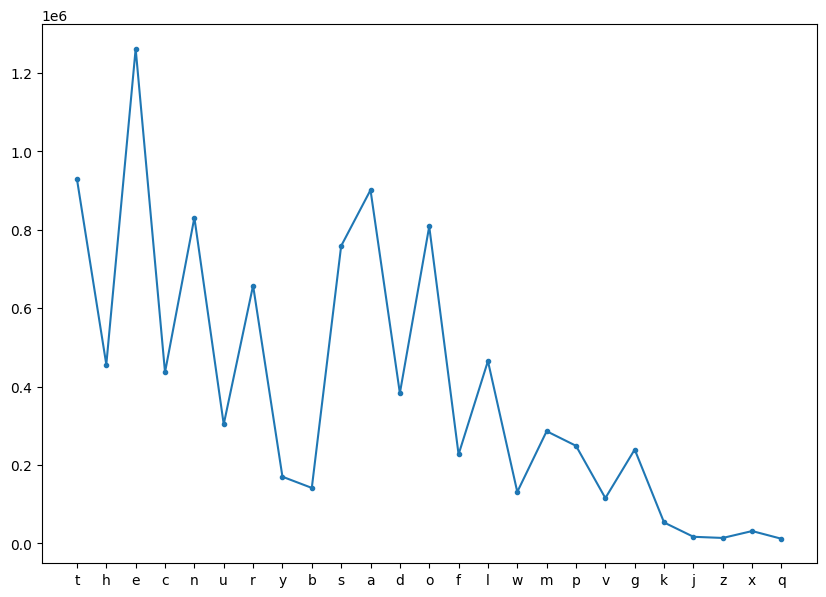

In [13]:
plot_ind(letters_eng)

Турецкий:

In [15]:
import wikipediaapi, time

texts_tur = open(r"C:\Users\lizao\Desktop\smth\shabat_tur.txt", 'w', encoding = 'utf-8')

wiki_wiki = wikipediaapi.Wikipedia(
        language='tr',
        extract_format=wikipediaapi.ExtractFormat.WIKI
)

page_py = wiki_wiki.page('Dilbilim')
for name in page_py.links.keys():
    texts_tur.write(wiki_wiki.page(name).text)
    time.sleep(2)

In [16]:
texts_tur = open(r"C:\Users\lizao\Desktop\smth\shabat_tur.txt", 'a', encoding = 'utf-8')

page_py = wiki_wiki.page('Fizik')
for name in page_py.links.keys():
    texts_tur.write(wiki_wiki.page(name).text)
    time.sleep(2)

In [18]:
texts_tur = open(r"C:\Users\lizao\Desktop\smth\shabat_tur.txt", 'a', encoding = 'utf-8')

page_py = wiki_wiki.page('Biyoloji')
for name in page_py.links.keys():
    texts_tur.write(wiki_wiki.page(name).text)
    time.sleep(2)

In [17]:
import string, os, re
letters_tur = {}
letset_tur = set(['q', 'w', 'e', 'r', 't', 'y', 'u', 'ı', 'o', 'p', 'ğ', 'ü', 'i', 'ş', 'l', 'k', 'j', 'h', 'g', 'f', 'd', 's', 'a', 'z', 'x', 'c', 'v', 'b', 'n', 'm', 'ö', 'ç'])
wordcount_tur = 0

with open(r"C:\Users\lizao\Desktop\smth\shabat_tur.txt", 'r', encoding = 'utf-8') as f:
     text_tur = f.read()

words_tur = re.finditer(r'[qwertyuıopğüişlkjhgfdsazxcvbnmöç]+(?:-[qwertyuıopğüişlkjhgfdsazxcvbnmöç]+)?', text_tur, re.I)
for word in words_tur:
    if wordcount_tur >= 2e6:
        break
    else:
        wordcount_tur += 1
        for char in word.group():
            if char.lower() in letset_tur:
                if char.lower() in letters_tur:
                    letters_tur[char.lower()] +=1
                else:
                    letters_tur[char.lower()] = 1

print(wordcount_tur)

664991


In [13]:
let_freq(letters_tur)

      корпус       
┏━━━━━━━┳━━━━━━━━━┓
┃ буква ┃ частота ┃
┡━━━━━━━╇━━━━━━━━━┩
│     a │  219153 │
│     i │  198499 │
│     e │  187514 │
│     l │  162231 │
│     n │  148170 │
│     r │  145421 │
│     k │   82341 │
│     ı │   81354 │
│     d │   81003 │
│     t │   75059 │
│     m │   72214 │
│     s │   69427 │
│     o │   57745 │
│     u │   55839 │
│     y │   49838 │
│     b │   45114 │
│     ş │   31242 │
│     ü │   29785 │
│     g │   27158 │
│     v │   23217 │
│     c │   22208 │
│     z │   21578 │
│     h │   19908 │
│     ç │   19053 │
│     p │   17598 │
│     ğ │   17162 │
│     ö │   16134 │
│     f │   13267 │
│     j │    4007 │
│     w │    2330 │
│     q │     870 │
│     x │     689 │
└───────┴─────────┘

In [14]:
let_freq_pers(letters_tur)

         корпус проценты         
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓
┃ буква ┃ частота (в процентах) ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩
│     a │                 10.97 │
│     i │                  9.94 │
│     e │                  9.39 │
│     l │                  8.12 │
│     n │                  7.42 │
│     r │                  7.28 │
│     k │                  4.12 │
│     ı │                  4.07 │
│     d │                  4.06 │
│     t │                  3.76 │
│     m │                  3.62 │
│     s │                  3.48 │
│     o │                  2.89 │
│     u │                   2.8 │
│     y │                   2.5 │
│     b │                  2.26 │
│     ş │                  1.56 │
│     ü │                  1.49 │
│     g │                  1.36 │
│     v │                  1.16 │
│     c │                  1.11 │
│     z │                  1.08 │
│     h │                   1.0 │
│     ç │                  0.95 │
│     p │                  0.88 │
│     ğ │                  0.86 │
│     ö │                  0.81 │
│     f │                  0.66 │
│     j │                   0.2 │
│     w │                  0.12 │
│     q │                  0.04 │
│     x │                  0.03 │
└───────┴───────────────────────┘

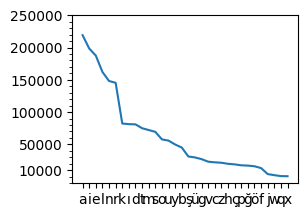

In [40]:
plot(letters_tur)

In [ ]:
tsipf(letters_tur)

In [ ]:
plot_ind(letters_tur)

Литовский:

In [3]:
import wikipediaapi, time
texts_lit = open(r"C:\Users\lizao\Desktop\smth\shabat_lit.txt", 'w', encoding = 'utf-8')

wiki_wiki = wikipediaapi.Wikipedia(
        language='lt',
        extract_format=wikipediaapi.ExtractFormat.WIKI
)

page_py = wiki_wiki.page('Kalbotyra')
for name in page_py.links.keys():
    texts_lit.write(wiki_wiki.page(name).text)
    time.sleep(2)

KeyboardInterrupt: 

In [2]:
import wikipediaapi, time

texts_lit = open(r"C:\Users\lizao\Desktop\smth\shabat_lit.txt", 'a', encoding = 'utf-8')

wiki_wiki = wikipediaapi.Wikipedia(
        language='lt',
        extract_format=wikipediaapi.ExtractFormat.WIKI
)

page_py = wiki_wiki.page('Fizika')
for name in page_py.links.keys():
    texts_lit.write(wiki_wiki.page(name).text)
    time.sleep(2)

In [5]:
texts_lit = open(r"C:\Users\lizao\Desktop\smth\shabat_lit.txt", 'a', encoding = 'utf-8')

page_py = wiki_wiki.page('Biologija')
for name in page_py.links.keys():
    texts_lit.write(wiki_wiki.page(name).text)
    time.sleep(2)

In [7]:
texts_lit = open(r"C:\Users\lizao\Desktop\smth\shabat_lit.txt", 'a', encoding = 'utf-8')

page_py = wiki_wiki.page('Psichologija')
for name in page_py.links.keys():
    texts_lit.write(wiki_wiki.page(name).text)
    time.sleep(2)

In [9]:
texts_lit = open(r"C:\Users\lizao\Desktop\smth\shabat_lit.txt", 'a', encoding = 'utf-8')

page_py = wiki_wiki.page('Senovės Graikijos istorija')
for name in page_py.links.keys():
    texts_lit.write(wiki_wiki.page(name).text)
    time.sleep(2)

In [10]:
import re
letters_lit = {}
letset_lit = set(['ą', 'č', 'ę', 'ė', 'į', 'š', 'ų', 'ū', 'ž', 'p', 'o', 'i', 'u', 'y', 't', 'r', 'e', 'w', 'q', 'a', 's', 'd', 'f', 'g', 'h', 'j', 'k', 'l', 'm', 'n', 'b', 'v', 'c', 'x', 'z'])
wordcount_lit = 0

with open(r"C:\Users\lizao\Desktop\smth\shabat_lit.txt", 'r', encoding = 'utf-8') as f:
     text_lit = f.read()


words_lit = re.finditer(r'[ąčęėįšųūžpoiuytrewqasdfghjklmnbvcxz]+(?:-[ąčęėįšųūžpoiuytrewqasdfghjklmnbvcxz]+)?', text_lit, re.I)

for word in words_lit:
    if wordcount_lit >= 2e6:
        break
    else:
        wordcount_lit += 1
        for char in word.group():
            if char.lower() in letset_lit:
                if char.lower() in letters_lit:
                    letters_lit[char.lower()] +=1
                else:
                    letters_lit[char.lower()] = 1

print(wordcount_lit)

2000000


In [13]:
let_freq(letters_lit)

      корпус       
┏━━━━━━━┳━━━━━━━━━┓
┃ буква ┃ частота ┃
┡━━━━━━━╇━━━━━━━━━┩
│     i │  272600 │
│     a │  220611 │
│     s │  158971 │
│     o │  128506 │
│     e │  116072 │
│     t │  113495 │
│     r │  112642 │
│     n │  101190 │
│     u │   84866 │
│     k │   80439 │
│     m │   73809 │
│     l │   68880 │
│     p │   53878 │
│     d │   51969 │
│     v │   46165 │
│     j │   43680 │
│     g │   39348 │
│     ė │   29819 │
│     y │   28613 │
│     b │   27940 │
│     ų │   25191 │
│     š │   20481 │
│     ž │   15318 │
│     c │   14629 │
│     ą │   13072 │
│     f │    9484 │
│     ū │    9030 │
│     į │    8880 │
│     h │    8585 │
│     z │    8284 │
│     č │    7313 │
│     ę │    3358 │
│     x │    1567 │
│     w │    1008 │
│     q │     306 │
└───────┴─────────┘

In [14]:
let_freq_pers(letters_lit)

         корпус проценты         
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓
┃ буква ┃ частота (в процентах) ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩
│     i │                 13.63 │
│     a │                 11.03 │
│     s │                  7.95 │
│     o │                  6.43 │
│     e │                   5.8 │
│     t │                  5.67 │
│     r │                  5.63 │
│     n │                  5.06 │
│     u │                  4.24 │
│     k │                  4.02 │
│     m │                  3.69 │
│     l │                  3.44 │
│     p │                  2.69 │
│     d │                   2.6 │
│     v │                  2.31 │
│     j │                  2.18 │
│     g │                  1.97 │
│     ė │                  1.49 │
│     y │                  1.43 │
│     b │                   1.4 │
│     ų │                  1.26 │
│     š │                  1.02 │
│     ž │                  0.77 │
│     c │                  0.73 │
│     ą │                  0.65 │
│     f │                  0.47 │
│     ū │                  0.45 │
│     į │                  0.44 │
│     h │                  0.43 │
│     z │                  0.41 │
│     č │                  0.37 │
│     ę │                  0.17 │
│     x │                  0.08 │
│     w │                  0.05 │
│     q │                  0.02 │
└───────┴───────────────────────┘

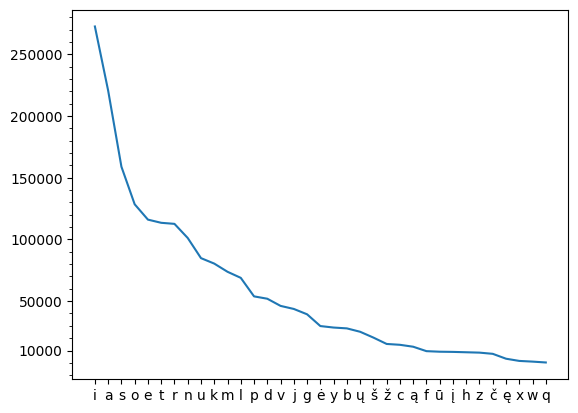

In [15]:
plot(letters_lit)

In [ ]:
tsipf(letters_lit)

In [ ]:
plot_ind(letters_lit)

Французский:

In [16]:
texts_fr = open(r"C:\Users\lizao\Desktop\smth\shabat_fr.txt", 'w', encoding = 'utf-8')

wiki_wiki = wikipediaapi.Wikipedia(
        language='fr',
        extract_format=wikipediaapi.ExtractFormat.WIKI
)

page_py = wiki_wiki.page('Linguistique')
for name in page_py.links.keys():
    texts_fr.write(wiki_wiki.page(name).text)
    time.sleep(2)

In [17]:
letters_fr = {}
letset_fr = set(['a', 'à', 'â', 'æ', 'b', 'c', 'ç', 'd', 'e', 'é', 'è', 'ê', 'ë', 'f', 'g', 'h', 'i', 'î', 'ï', 'j', 'k', 'l', 'm', 'n', 'o', 'ô', 'œ', 'p', 'q', 'r', 's', 't', 'u', 'ù', 'û', 'ü', 'v', 'w', 'x', 'y', 'ÿ', 'z'])
wordcount_fr = 0

with open(r"C:\Users\lizao\Desktop\smth\shabat_fr.txt", 'r', encoding = 'utf-8') as f:
     text_fr = f.read()

words_fr = re.finditer(r'[AÀÂÆBCÇDEÉÈÊËFGHIÎÏJKLMNOÔŒPQRSTUÙÛÜVWXYŸZ]+(?:-[AÀÂÆBCÇDEÉÈÊËFGHIÎÏJKLMNOÔŒPQRSTUÙÛÜVWXYŸZ]+)?', text_fr, re.I)
for word in words_fr:
    if wordcount_fr == 2e6:
        break
    else:
        wordcount_fr += 1
        for char in word.group():
            if char.lower() in letset_fr:
                if char.lower() in letters_fr:
                    letters_fr[char.lower()] +=1
                else:
                    letters_fr[char.lower()] = 1

print(wordcount_fr)

2000000


In [18]:
let_freq(letters_fr)

      корпус       
┏━━━━━━━┳━━━━━━━━━┓
┃ буква ┃ частота ┃
┡━━━━━━━╇━━━━━━━━━┩
│     e │  283207 │
│     s │  160771 │
│     i │  156517 │
│     n │  153919 │
│     a │  150369 │
│     t │  137799 │
│     r │  126331 │
│     l │  119202 │
│     o │  111326 │
│     u │  105556 │
│     d │   78372 │
│     c │   69897 │
│     p │   58966 │
│     m │   56632 │
│     é │   47403 │
│     g │   31164 │
│     f │   21947 │
│     v │   21340 │
│     h │   21213 │
│     q │   20556 │
│     b │   17558 │
│     x │    9538 │
│     y │    8297 │
│     è │    6957 │
│     à │    6605 │
│     j │    4797 │
│     k │    3368 │
│     ç │    1963 │
│     ê │    1856 │
│     w │    1839 │
│     z │    1628 │
│     î │     637 │
│     ô │     554 │
│     â │     487 │
│     ï │     416 │
│     ù │     359 │
│     œ │     257 │
│     ü │     164 │
│     û │     141 │
│     ë │      54 │
│     æ │      26 │
│     ÿ │       1 │
└───────┴─────────┘

In [19]:
let_freq_pers(letters_fr)

         корпус проценты         
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓
┃ буква ┃ частота (в процентах) ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩
│     e │                 14.16 │
│     s │                  8.04 │
│     i │                  7.83 │
│     n │                   7.7 │
│     a │                  7.52 │
│     t │                  6.89 │
│     r │                  6.32 │
│     l │                  5.96 │
│     o │                  5.57 │
│     u │                  5.28 │
│     d │                  3.92 │
│     c │                  3.49 │
│     p │                  2.95 │
│     m │                  2.83 │
│     é │                  2.37 │
│     g │                  1.56 │
│     f │                   1.1 │
│     v │                  1.07 │
│     h │                  1.06 │
│     q │                  1.03 │
│     b │                  0.88 │
│     x │                  0.48 │
│     y │                  0.41 │
│     è │                  0.35 │
│     à │                  0.33 │
│     j │                  0.24 │
│     k │                  0.17 │
│     ç │                   0.1 │
│     ê │                  0.09 │
│     w │                  0.09 │
│     z │                  0.08 │
│     ô │                  0.03 │
│     î │                  0.03 │
│     â │                  0.02 │
│     ï │                  0.02 │
│     ù │                  0.02 │
│     û │                  0.01 │
│     ü │                  0.01 │
│     œ │                  0.01 │
│     ë │                   0.0 │
│     æ │                   0.0 │
│     ÿ │                   0.0 │
└───────┴───────────────────────┘

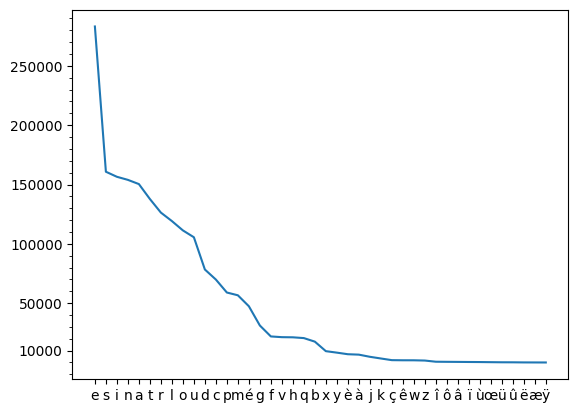

In [20]:
plot(letters_fr)

In [ ]:
tsipf(letters_fr)

In [ ]:
plot_ind(letters_fr)

Немецкий:

In [21]:
texts_de = open(r"C:\Users\lizao\Desktop\smth\shabat_ger.txt", 'w', encoding = 'utf-8')

wiki_wiki = wikipediaapi.Wikipedia(
        language='de',
        extract_format=wikipediaapi.ExtractFormat.WIKI
)

page_py = wiki_wiki.page('Sprachwissenschaft')
for name in page_py.links.keys():
    texts_de.write(wiki_wiki.page(name).text)
    time.sleep(2)

In [22]:
letters_de = {}
letset_de = set(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'ä', 'ö', 'ü', 'ß'])
wordcount_de = 0

with open(r"C:\Users\lizao\Desktop\smth\shabat_ger.txt", 'r', encoding = 'utf-8') as f:
     text_de = f.read()


words_de = re.finditer(r'[ABCDEFGHIJKLMNOPQRSTUVWXYZÄÖÜẞ]+(?:-[ABCDEFGHIJKLMNOPQRSTUVWXYZÄÖÜẞ]+)?', text_de, re.I)
for word in words_de:
    if wordcount_de >= 2e6:
        break
    else:
        wordcount_de += 1
        for char in word.group():
            if char.lower() in letset_de:
                if char.lower() in letters_de:
                    letters_de[char.lower()] +=1
                else:
                    letters_de[char.lower()] = 1

print(wordcount_de)

2000000


In [23]:
let_freq(letters_de)

      корпус       
┏━━━━━━━┳━━━━━━━━━┓
┃ буква ┃ частота ┃
┡━━━━━━━╇━━━━━━━━━┩
│     e │  305918 │
│     n │  191613 │
│     i │  166454 │
│     r │  147882 │
│     s │  136211 │
│     t │  125461 │
│     a │  114291 │
│     d │   96358 │
│     h │   89317 │
│     u │   80023 │
│     l │   75820 │
│     c │   63193 │
│     o │   60921 │
│     g │   60105 │
│     m │   50292 │
│     b │   38741 │
│     f │   32599 │
│     k │   32021 │
│     w │   25902 │
│     p │   25112 │
│     z │   22113 │
│     v │   19552 │
│     ü │   10247 │
│     ä │   10108 │
│     y │    5121 │
│     j │    4865 │
│     ö │    4624 │
│     ß │    2267 │
│     x │    2265 │
│     q │     595 │
└───────┴─────────┘

In [24]:
let_freq_pers(letters_de)

         корпус проценты         
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓
┃ буква ┃ частота (в процентах) ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩
│     e │                  15.3 │
│     n │                  9.58 │
│     i │                  8.32 │
│     r │                  7.39 │
│     s │                  6.81 │
│     t │                  6.27 │
│     a │                  5.71 │
│     d │                  4.82 │
│     h │                  4.47 │
│     u │                   4.0 │
│     l │                  3.79 │
│     c │                  3.16 │
│     o │                  3.05 │
│     g │                  3.01 │
│     m │                  2.51 │
│     b │                  1.94 │
│     f │                  1.63 │
│     k │                   1.6 │
│     w │                   1.3 │
│     p │                  1.26 │
│     z │                  1.11 │
│     v │                  0.98 │
│     ü │                  0.51 │
│     ä │                  0.51 │
│     y │                  0.26 │
│     j │                  0.24 │
│     ö │                  0.23 │
│     ß │                  0.11 │
│     x │                  0.11 │
│     q │                  0.03 │
└───────┴───────────────────────┘

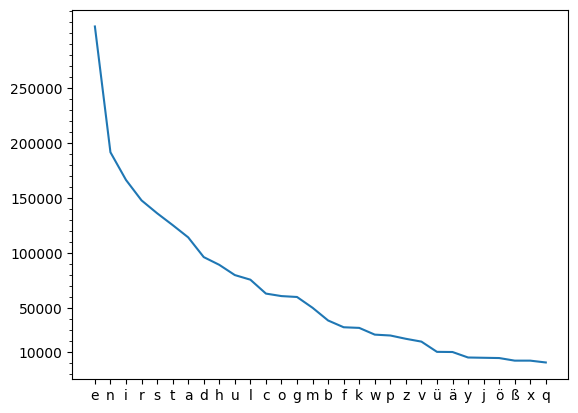

In [25]:
plot(letters_de)

In [ ]:
tsipf(letters_de)

In [ ]:
plot_ind(letters_de)

Итальянский:

In [26]:
texts_it = open(r"C:\Users\lizao\Desktop\smth\shabat_it.txt", 'w', encoding = 'utf-8')

wiki_wiki = wikipediaapi.Wikipedia(
        language='it',
        extract_format=wikipediaapi.ExtractFormat.WIKI
)

page_py = wiki_wiki.page('Linguistica')
for name in page_py.links.keys():
    texts_it.write(wiki_wiki.page(name).text)
    time.sleep(2)

In [27]:
letters_it = {}
letset_it = set(['a', 'à', 'b', 'c', 'd', 'e', 'è', 'é', 'f', 'g', 'h', 'i', 'ì', 'í', 'l', 'm', 'n', 'o', 'ò', 'ó', 'p', 'q', 'r', 's', 't', 'u', 'ù', 'ú', 'v', 'z'])
wordcount_it = 0

with open(r"C:\Users\lizao\Desktop\smth\shabat_it.txt", 'r', encoding = 'utf-8') as f:
     text_it = f.read()

words_it = re.finditer(r'[AÀBCDEÈÉFGHIÌÍLMNOÒÓPQRSTUÙÚVZ]+(?:-[AÀBCDEÈÉFGHIÌÍLMNOÒÓPQRSTUÙÚVZ]+)?', text_it, re.I)
    
for word in words_it:
    if wordcount_it >= 2e6:
        break
    else:
        wordcount_it += 1
        for char in word.group():
            if char.lower() in letset_it:
                if char.lower() in letters_it:
                    letters_it[char.lower()] +=1
                else:
                    letters_it[char.lower()] = 1

print(wordcount_de)

2000000


In [28]:
let_freq(letters_it)

      корпус       
┏━━━━━━━┳━━━━━━━━━┓
┃ буква ┃ частота ┃
┡━━━━━━━╇━━━━━━━━━┩
│     i │  194942 │
│     e │  185602 │
│     a │  163406 │
│     o │  144081 │
│     n │  116464 │
│     l │  110967 │
│     t │  105815 │
│     r │   96627 │
│     s │   85196 │
│     c │   73597 │
│     d │   61342 │
│     u │   50264 │
│     m │   41692 │
│     p │   41242 │
│     g │   31026 │
│     f │   20722 │
│     v │   20705 │
│     h │   16677 │
│     z │   15909 │
│     b │   14418 │
│     q │    5442 │
│     à │    3741 │
│     è │    3294 │
│     ò │    1464 │
│     ù │    1229 │
│     é │     880 │
│     ì │     504 │
│     í │      30 │
│     ó │      14 │
│     ú │       7 │
└───────┴─────────┘

In [29]:
let_freq_pers(letters_it)

         корпус проценты         
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓
┃ буква ┃ частота (в процентах) ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩
│     i │                 12.13 │
│     e │                 11.55 │
│     a │                 10.17 │
│     o │                  8.96 │
│     n │                  7.25 │
│     l │                   6.9 │
│     t │                  6.58 │
│     r │                  6.01 │
│     s │                   5.3 │
│     c │                  4.58 │
│     d │                  3.82 │
│     u │                  3.13 │
│     m │                  2.59 │
│     p │                  2.57 │
│     g │                  1.93 │
│     f │                  1.29 │
│     v │                  1.29 │
│     h │                  1.04 │
│     z │                  0.99 │
│     b │                   0.9 │
│     q │                  0.34 │
│     à │                  0.23 │
│     è │                   0.2 │
│     ò │                  0.09 │
│     ù │                  0.08 │
│     é │                  0.05 │
│     ì │                  0.03 │
│     í │                   0.0 │
│     ú │                   0.0 │
│     ó │                   0.0 │
└───────┴───────────────────────┘

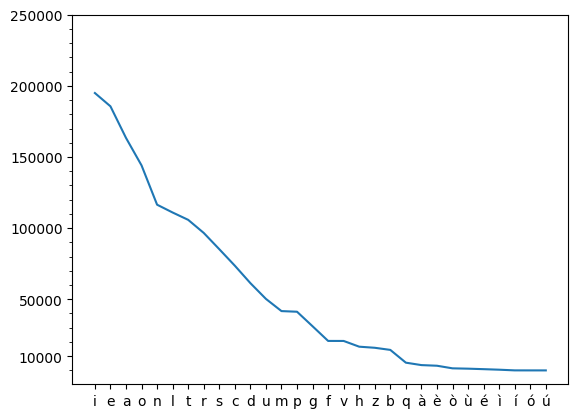

In [30]:
plot(letters_it)

In [ ]:
tsipf(letters_it)

In [ ]:
plot_ind(letters_it)

In [ ]:
fig = plt.figure()
ax_ru = fig.add_subplot(111)
ax_eng = fig.add_subplot(212)
ax_tur = fig.add_subplot(313)
ax_lit = fig.add_subplot(414)
ax_fr = fig.add_subplot(125)
ax_de = fig.add_subplot(226)
ax_it = fig.add_subplot(327)

ax_ru.set_title('Русский')
x_rus = [str(i) for i in letters.keys()]
y_rus = [i for i in letters.values()]
x_grid_rus = x_rus
y_grid_rus = [round(max([i for i in letters.values()]) / i, 1) for i in range(1, 33)]
ax_ru.plot(x_rus, y_rus, marker='o', markersize = 3)
ax_ru.plot(x_grid_rus, y_grid_rus, marker='o', markersize = 3)
ax_ru.set_yticks([y_grid_rus[0], y_grid_rus[1], y_grid_rus[2], y_grid_rus[7], y_grid_rus[15], y_grid_rus[len(y_grid_rus)-1]])
plt.grid(True, color = "grey", linewidth = "0.8", linestyle = '--')

fig.set_figheight(10)
fig.set_figwidth(15)
plt.show()

In [7]:
def print_langlinks(page):
    langlinks = page.langlinks
    for k in sorted(langlinks.keys()):
        v = langlinks[k]
        print(f"{k}: {v.language} - {v.title}: {v.fullurl}")

print_langlinks(page_py)

af: af - Taalwetenskappe: https://af.wikipedia.org/wiki/Taalwetenskappe
als: als - Linguistik: https://als.wikipedia.org/wiki/Linguistik
am: am - የቋንቋ ጥናት: https://am.wikipedia.org/wiki/%E1%8B%A8%E1%89%8B%E1%8A%95%E1%89%8B_%E1%8C%A5%E1%8A%93%E1%89%B5
an: an - Lingüistica: https://an.wikipedia.org/wiki/Ling%C3%BCistica
ang: ang - Sprǣccræft: https://ang.wikipedia.org/wiki/Spr%C7%A3ccr%C3%A6ft
ar: ar - لسانيات: https://ar.wikipedia.org/wiki/%D9%84%D8%B3%D8%A7%D9%86%D9%8A%D8%A7%D8%AA
arz: arz - علم اللغويات: https://arz.wikipedia.org/wiki/%D8%B9%D9%84%D9%85_%D8%A7%D9%84%D9%84%D8%BA%D9%88%D9%8A%D8%A7%D8%AA
as: as - ভাষাবিজ্ঞান: https://as.wikipedia.org/wiki/%E0%A6%AD%E0%A6%BE%E0%A6%B7%E0%A6%BE%E0%A6%AC%E0%A6%BF%E0%A6%9C%E0%A7%8D%E0%A6%9E%E0%A6%BE%E0%A6%A8
ast: ast - Llingüística: https://ast.wikipedia.org/wiki/Lling%C3%BC%C3%ADstica
avk: avk - Avopa: https://avk.wikipedia.org/wiki/Avopa
az: az - Dilçilik: https://az.wikipedia.org/wiki/Dil%C3%A7ilik
azb: azb - دیلچیلیک: https://azb.wikipedi